In [1]:
from networkx.generators import directed
import networkx as nx
g=nx.read_edgelist('/content/soc-Epinions1.txt.gz',create_using=nx.DiGraph()) #as given graph is directed reading it as directed.

In [2]:
total_nodes=g.number_of_nodes()
print(total_nodes)# total number of nodes

75879


In [3]:
each_node_degree=[]
for node,val in g.degree(): #taking each node degree values to list.
  each_node_degree.append(val)

In [4]:
min_degree= float('inf')
max_degree= float('-inf') 
for x in each_node_degree: 
  min_degree= min(min_degree,x)
  max_degree= max(max_degree,x)            #from the list of degree values of each nodes taking min degree and max degree 
degree_frequency_cache={}
for x in each_node_degree:
  if x not in degree_frequency_cache:    #making frequency of degreee from list of each node degree by using hashmap.
    degree_frequency_cache[x]=0
  degree_frequency_cache[x]+=1



In [5]:
degrees=[] #x-axis
frequencies=[]
for x in degree_frequency_cache:                      
  degrees.append(x)                                 #from hashmap keys are degrees and respective values are frequencies . These 2 are taken in lists for futhure computation.
  frequencies.append(degree_frequency_cache[x])
probabilities=[] #y-axis
for y in frequencies:               
  probability = y/total_nodes             #from frequencies list calculating probability(k) for each and storing in lists.
  probabilities.append(probability)

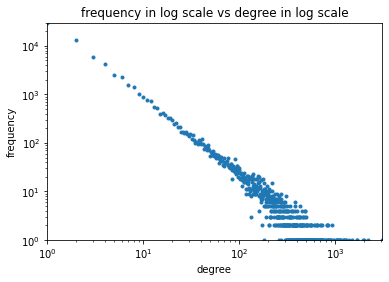

In [6]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt                                                                             
plt.figure(1)   
                                                                                                                                                                                                                                                      
# prep axes                                                                                                                      
plt.xlabel('degree')                                                                                                             
plt.xscale('log')              #degrees values in list are taken as x-axis with log scaled.                                                                                                   
plt.xlim(1, max_degree)  
                                                                                                           
plt.ylabel('frequency')                                                                                                          
plt.yscale('log')               #Frequencies values from list are taken as y-axis with log scaled.                                                                                                   
plt.ylim(1, max(frequencies))

plt.title('frequency in log scale vs degree in log scale')
                                                                                                                                                                                                                                                        
plt.scatter(degrees, frequencies, marker='.')                                                                                                    
plt.show()

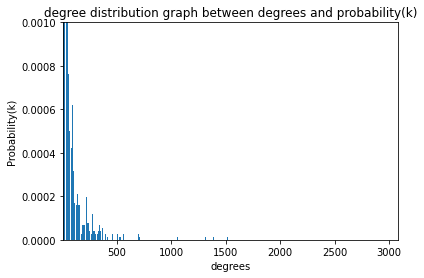

In [14]:
plt.bar(degrees, probabilities)                                                
plt.ylabel("Probability(k)")
plt.title("degree distribution graph between degrees and probability(k)")
plt.xlim(1,max_degree)
plt.ylim(0,0.001)   #bar plot between degree distribution vs probability(k) is plotted with limiting x and y-axis for graph visibility.
plt.xlabel("degrees")
plt.show() 

#clustering coefficient of this graph

In [8]:
clustering_coeficient_cache=nx.clustering(g) #returns hashmap with nodes as key and their clustering coeeficients as values.

In [9]:
total_clustering_coefficients=0
for x in clustering_coeficient_cache:    #from the hashmap finding average clustering coefficient of a network in iteration of it.
  total_clustering_coefficients+=clustering_coeficient_cache[x]
average_coefficient=total_clustering_coefficients/total_nodes

In [11]:
print(average_coefficient)
#print(nx.average_clustering(g))

0.11017387558244757


Importance of clustering coefficient :- It tells us how much likely nodes are connected together . For this graph we got value to be 0.1101... . The value cannot be said guranteely if it is good or not. This depends on the situation in which requirement of connectivity is necessary or not. If in a situation we need more connectivity then this value is slightly less if not this value may be okay.

# exercise -d

Real applications of centrality measures :-
1) In politics , we need centrality measures for data scientists to identify who are the most influential leaders in a network of politicians .
2) Doctors need to identify a central cell which is the reason for the fast spreader of any virus, disease or cancer . And this can be solved by using centrality measure over infected cell.
3) Cyber security officers or attackers need centrality measures to identify a central node which is very near to major of the nodes to which attack or saving must be done to prevent damage to neighbours.